In [1]:
# Import packages
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import deep Q agent
from dql import DQAgent

In [2]:
# Parameters
action_size = 11
num_episodes = 1500
save_freq = 500
batch_size = 32
memory_size = 100_000
activation_function = 'tanh'

epsilon_min = 0.01
epsilon_decay = 0.00015

In [3]:
# Train
agent = DQAgent(state_size=11,
                action_size=action_size,
                epsilon_min=epsilon_min,
                epsilon_decay=epsilon_decay,
                memory_size=memory_size,
                activation_function=activation_function)
env = gym.make("InvertedDoublePendulum-v4")
returns, steps = agent.train(env, num_episodes, save_freq, batch_size)

Episode 1/1500 | Reward: 63.37 | Steps: 9 | Epsilon: 1.00 | Memory: 9
Episode 2/1500 | Reward: 35.75 | Steps: 6 | Epsilon: 1.00 | Memory: 15
Episode 3/1500 | Reward: 44.98 | Steps: 7 | Epsilon: 1.00 | Memory: 22
Episode 4/1500 | Reward: 35.66 | Steps: 6 | Epsilon: 1.00 | Memory: 28
Episode 5/1500 | Reward: 63.84 | Steps: 9 | Epsilon: 1.00 | Memory: 37
Episode 6/1500 | Reward: 44.91 | Steps: 7 | Epsilon: 1.00 | Memory: 44
Episode 7/1500 | Reward: 35.77 | Steps: 6 | Epsilon: 1.00 | Memory: 50
Episode 8/1500 | Reward: 26.60 | Steps: 5 | Epsilon: 1.00 | Memory: 55
Episode 9/1500 | Reward: 26.87 | Steps: 5 | Epsilon: 1.00 | Memory: 60
Episode 10/1500 | Reward: 17.10 | Steps: 4 | Epsilon: 1.00 | Memory: 64
Episode 11/1500 | Reward: 45.13 | Steps: 7 | Epsilon: 0.99 | Memory: 71
Episode 12/1500 | Reward: 45.22 | Steps: 7 | Epsilon: 0.99 | Memory: 78
Episode 13/1500 | Reward: 17.00 | Steps: 4 | Epsilon: 0.99 | Memory: 82
Episode 14/1500 | Reward: 35.52 | Steps: 6 | Epsilon: 0.99 | Memory: 88
Ep

In [4]:
print(f'Average return last 100 episodes: {np.mean(returns[-100: ]):.2f}')
print(f'Average step reached last 100 episodes: {np.mean(steps[-100: ]):.2f}')

Average return last 100 episodes: 1216.09
Average step reached last 100 episodes: 132.61


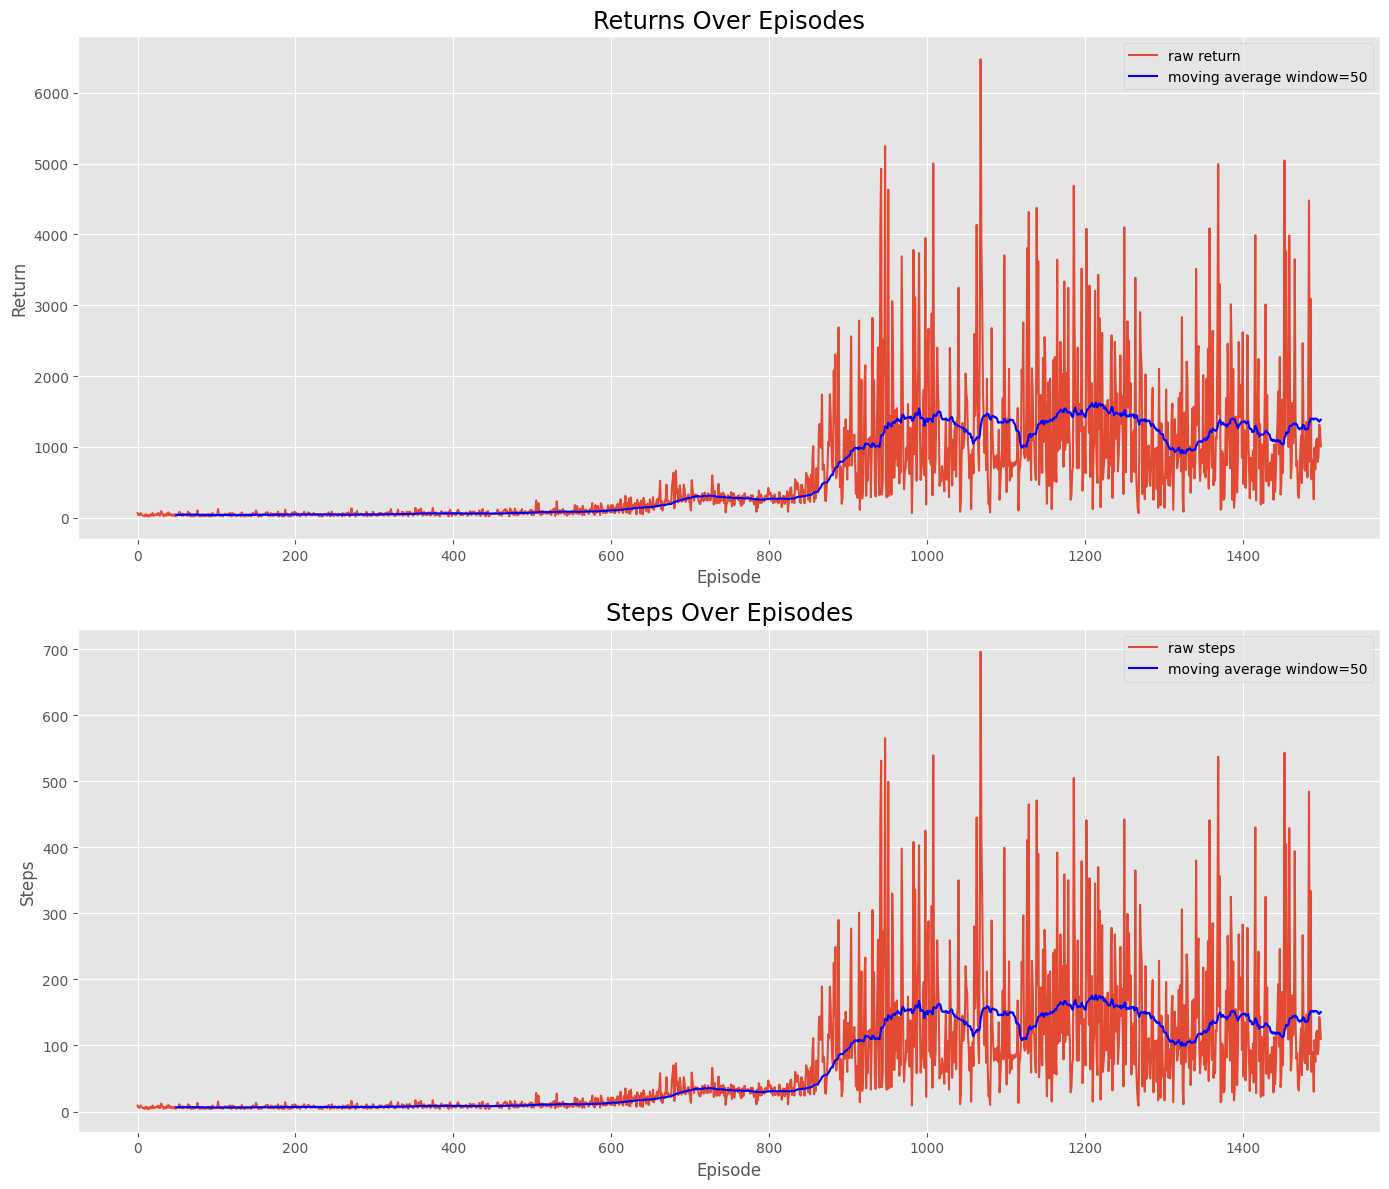

In [5]:
plt.style.use('ggplot')
ma_window = 50
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), tight_layout=True)

# Plot 1
ax1.plot(returns, label='raw return')
ax1.plot(pd.Series(returns).rolling(ma_window).mean(), label=f'moving average window={ma_window}', color='blue')
ax1.set_title('Returns Over Episodes', fontsize='xx-large')
ax1.set_xlabel('Episode')
ax1.legend()
ax1.set_ylabel('Return')

# Plot 2
ax2.plot(steps, label='raw steps')
ax2.plot(pd.Series(steps).rolling(ma_window).mean(), label=f'moving average window={ma_window}', color='blue')
ax2.set_title('Steps Over Episodes', fontsize='xx-large')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Steps')
ax2.legend()

plt.show()